<a href="https://colab.research.google.com/github/haniJ2000/codealpha_tasks/blob/main/codealpha_task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from google.colab import files

In [ ]:
#Upload the CSV file
uploaded = files.upload()

# Read the unemployment dataset
df = pd.read_csv('car data.csv')

# Check the first few rows of the dataset
df.head()

Saving car data.csv to car data.csv


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# Basic info of the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [ ]:
label_encoder = LabelEncoder()
df['Fuel_Type'] = label_encoder.fit_transform(df['Fuel_Type'])
df['Selling_type'] = label_encoder.fit_transform(df['Selling_type'])
df['Transmission'] = label_encoder.fit_transform(df['Transmission'])


In [ ]:
df['Car_Age'] = 2024 - df['Year']  # Assuming the current year is 2024
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)  # Drop 'Year' and 'Car_Name' since they are no longer needed

In [ ]:
print(df.head())

   Selling_Price  Present_Price  Driven_kms  Fuel_Type  Selling_type  \
0           3.35           5.59       27000          2             0   
1           4.75           9.54       43000          1             0   
2           7.25           9.85        6900          2             0   
3           2.85           4.15        5200          2             0   
4           4.60           6.87       42450          1             0   

   Transmission  Owner  Car_Age  
0             1      0       10  
1             1      0       11  
2             1      0        7  
3             1      0       13  
4             1      0       10  


In [ ]:
X = df.drop(['Selling_Price'], axis=1)
y = df['Selling_Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predictions on the test data
y_pred = lr_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)

Root Mean Squared Error (RMSE): 1.8792498207978197
R-squared (R2) Score: 0.8466902419663828


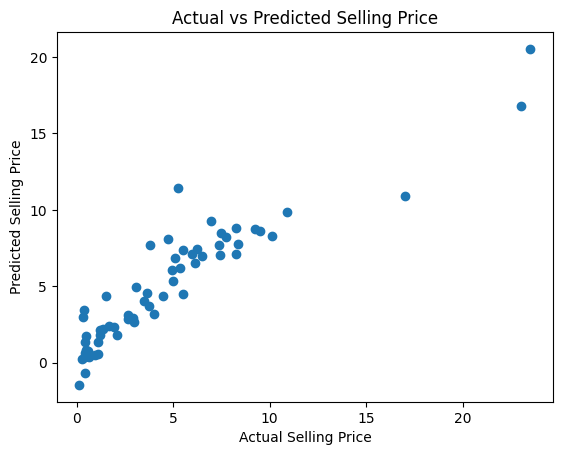

In [ ]:
# Visualizing the results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price')
plt.title('Actual vs Predicted Selling Price')
plt.show()

<ipython-input-15-af9a0cfa201f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred), bins=50)


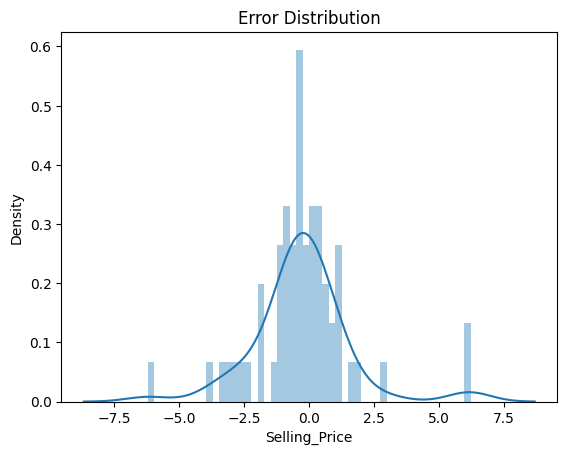

In [ ]:
# Visualizing the error distribution
sns.distplot((y_test - y_pred), bins=50)
plt.title('Error Distribution')
plt.show()